In [1]:
# Install modules
! pip install python-mnist

You should consider upgrading via the 'c:\users\rahul\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
# import packages
from mnist import MNIST
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# Load data
mndata = MNIST('samples')
mndata.gz = True

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [4]:
train_images = np.array([np.array(image).reshape(28,28) for image in train_images])
test_images = np.array([np.array(image).reshape(28,28) for image in test_images])
train_labels = np.array([label-1 for label in train_labels ])
test_labels = np.array([label-1 for label in test_labels ])

In [5]:
def showImage(image):
    plt.imshow(image,cmap=plt.cm.binary)
    plt.show()

In [6]:
def getCharAndLabel(image,label):
    alphabets = 'a b c d e f g h i j k l m n o p q r s t u v w x y z'.split(' ')
    #image = np.array(image)
    #image = image.reshape(28,28)
    image = np.transpose(image)
    return image,label,alphabets[label]

In [7]:
def showRandomImageFrom(images,labels,index=None):
    if index == None:
        index = random.randrange(0, len(images))
    image,label,character = getCharAndLabel(images[index],labels[index])
    showImage(image)
    print(label,character)
    return label,character,index

In [8]:
test_labels.shape

(20800,)

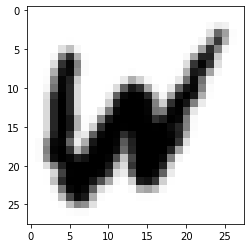

22 w


(22, 'w', 17943)

In [9]:
showRandomImageFrom(images=test_images,labels=test_labels)

In [10]:
# check if size of all images is same
size = set()
for im in test_images:
    size.add(len(im))
size

{28}

In [11]:
train_images.shape

(124800, 28, 28)

In [12]:
# size is same so no need of preprocessing
# time to create a neural network architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(26,activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
x_train = tf.keras.utils.normalize(train_images,axis=1)
x_test = tf.keras.utils.normalize(test_images,axis=1)

In [15]:
model.fit(x_train,train_labels,epochs=3)

Train on 124800 samples
Epoch 1/3
124800/124800 [==============================] - 19s 148us/sample - loss: 0.7550 - accuracy: 0.7710
Epoch 2/3
124800/124800 [==============================] - 13s 100us/sample - loss: 0.4168 - accuracy: 0.8679
Epoch 3/3
124800/124800 [==============================] - 13s 101us/sample - loss: 0.3414 - accuracy: 0.8886


In [16]:
val_loss,val_acc = model.evaluate(x_test,test_labels,verbose=0)
print(val_loss,val_acc)

0.3648055627426276 0.8845673


In [18]:
predictions = model.predict([x_test])
type(predictions)

numpy.ndarray

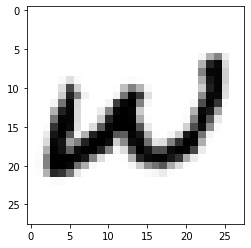

22 w


22

In [19]:
lab,char,index = showRandomImageFrom(images=test_images,labels=test_labels)
np.argmax(predictions[index])